# Decision trees og random forest

Decision trees, og specielt dets "big brother metode" random forests, er en af de mest vidt brugte metoder i Machine learning. De er hurtige at træne, relativt kraftfulde, og vigtigst af alt *explianable*.

Ovenpå det, er de super nemme at forstå konceptuelt, det handler essentielt set bare om at stille de rigtige ja/nej spørgsmål de rigtige steder. 

Problemerne kommer når vi skal finde på de her ja/nej spørgsmål. Her skal vi først have et koncept af information, altså hvilke ja/nej spørgsmål giver os størst information, og vi skal have en idé om hvordan vi vælger disse spørgsmål.

I disse opgaver vil vi fokusere på blot den første del, at kvantificere informationen i forskellige ja/nej spørgsmål...

## Entropi

Entropi er reelt set en måde at måle kaos eller usikkerhed på i et system. Definitionen ser lidt wonky ud:

$$H(X) = - \sum^N_{i=1} P(x_i)\log_2 P(x_i) $$

Dette giver os en tilfældig variabel's usikkerhed i *bits* (ja, de samme bits som din computer bruger!). Intuitivt siger dette noget om "Hvor mange *optimale* ja/nej spørgsmål skal jeg *i gennemsnit* still, for at finde ud af hvad en tilfældig variabel er?". Dette er illustreret nedenunder

![](images/dice_entropy.png)

Her er vist hvordan man bedst skal stille spørgsmål for at gætte hvad en 6-sidet terning er landet på. Som I kan se, slutter træet nogle gange tidligt, hvilket medfører at entropien af terningen ikke er et heltal, men nemlig 2.5849...

Udover at være vigtigt for at forstå decision trees, forekommer entropi implicit mange steder i machine learning. Man snakker om at "høj entropi data" er sværere at lære, da der er mere usikkerhed, men enkelte datapunkter med høj entropi er bedre at fokusere på, da de repræsenterer steder hvor ens model er meget usikker. Cross-*entropy* er en metode man bruger til at træne neurale netværk til classification.

## Purity og 'Purity gain'

Når vi laver et decision tree, snakker vi ofte om at prøve at maksimere dataens "purity". Dette svarer essentielt set til at "minimere mængden af svar det data kan have".

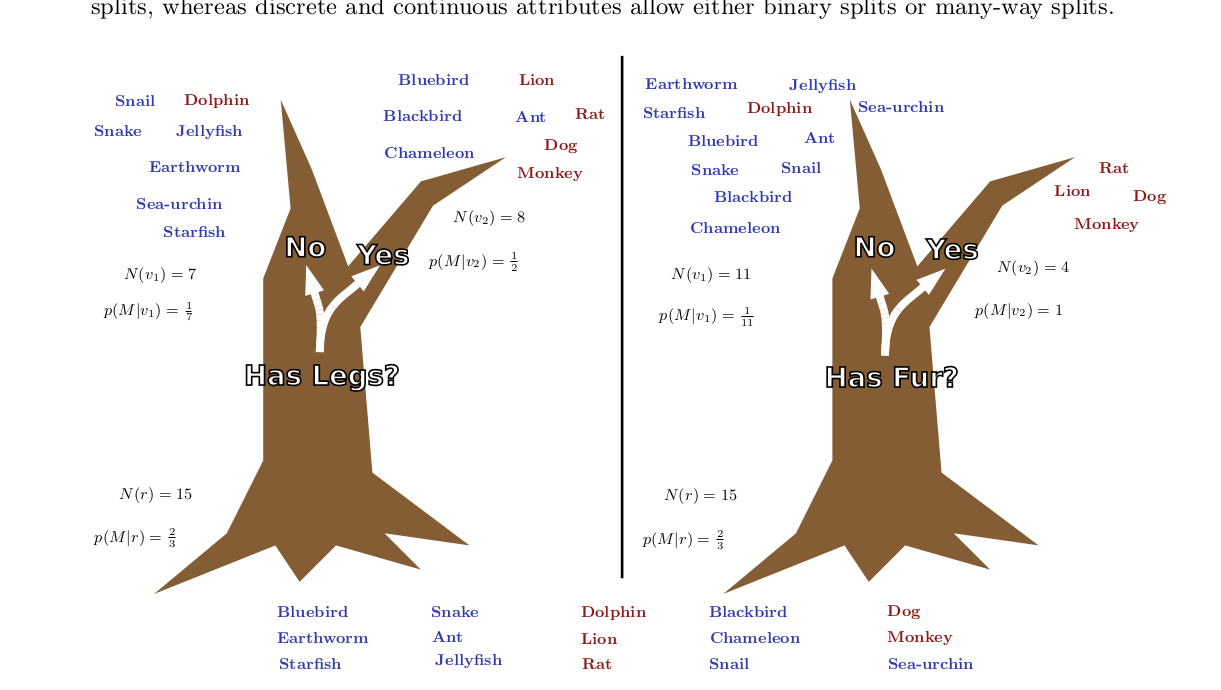

Vist ovenover, prøver vi at adskille pattedyr fra ikke-pattedyr. Begge spørgsmål der bliver stillet, er ret gode, da de næsten fjerner alle ikke-pattedyr fra alle pattedyr. Her kunne vi godt stoppe vores decision tree og sige "den er god nok", velvidende om, at vi *empirisk* ville misse nogle pattedyr som ikke-pattedyr, og vice-versa.

Vi kan også vælge at fortsætte træet og forhåbentlig få et mere præcist træ, men det kræver flere splits, som kræver mere computerkraft, osv.

Normalt har vi tre forskellige måder at måle dette på:

$$\text{Entropi:} \quad \text{Entropy}(v) = -\sum^C_{c=1} p(c|v)\log_2p(c|v)  \quad$$

$$\text{Gini:} \quad \text{Gini}(v) =  1 - \sum^C_{c=1}p(c|v)^2$$

$$\text{ClassError:} \quad \text{ClassError}(v) = 1 - \underset{c}{\max}(p(c|v))$$

Hvor at $v$ repræsenterer et specifikt *split* af vores data, og $c$ er en specifik klasse, $p(v|c)$ er derfor sandsynligheden for at et vilkårligt datapunkt i splittet $v$ er i en given klasse $c$.

Eksempelvis hvis vi har to klasser, *Fra Sjælland* og *Fra Jylland* og vores split består af [Omar, Lachlan, Yifeng, Oskar, Karl, Mohammad], så vil $p(\text{jylland}|v) = \frac{2}{6}$ og $p(\text{sjælland}|v) = \frac{4}{6}$, da kun Mohammad og Karl er fra Jylland.


## Hunt's algoritme

Måden man rent faktisk finder det optimale decision tree på, og grunden til vi ikke kommer til at lave det selv, er Hunt's algoritme, den består af følgende:

1. Start fra roden af træet (indeholder alt data)
2. Split dataen på en helt masse måder
3. Udregn puritien af alle disse forskellige måder
4. Vælg det split med højst purity
5. Check om træet er dybt nok, eller om purity er højt nok. Hvis ikke, så tilføj et split mere...

Dette er relativt simpelt, men meget svært at implementere i praksis... og af den grund kommmer vi ikke til at gøre det.

## Opgave 2 - Adskil fighter jets fra hinanden

**Antag du er ansat af det kendte militær-informations firma *Barad-dur*. Din opgave er at lave et decision tree baseret på nogle fly og deres typer som findes i virkeligheden.** 

**Du er blevet givet et dataset, "aircraft_dataset.csv" som indeholder nogle vigtige informationer om et givent fly der er spottet. Yderligere, da dette er fredstid, kender vi den præcise model af hvert fly (en slags y værdi, eller target), men antag at modellen skal bruges i krigstid hvor modellen af fly ikke kendes og derfor skal bestemmes af din model.** 


**Du kan datasættet loaded i cellen nedenunder, sammen med nogle tips til hvordan du kan undersøge det. Brug dette datasæt til at svare på følgende spørgsmål:**

**2.1: Hvor stor en andel af de spottede fly er af modellen F-35'ere?**

$\dots$

**2.2: Hvor mange lande er B2'eren spottet i?**

$\dots$

**2.3: Hvor stor en del af datasættet betsår af fly fra rusland?**

$\dots$

**2.4: Brug dataen til at bestemme: hvis vi blot ønsker klassificere om noget er et bombefly (dvs. en B-2 Spirit eller en B-52 Stratofotress), hvilken beslutningsregel kan vi så lave?**

$\dots$

**2.5: Baseret på dataen ses det, at med kun to spørgsmål kan vi perfekt adskille F-35 Lightning fly fra alle andre. Hvilke to spørgsmål er dette?**

$\dots$

**2.6: Hvis vi antager at modellen af fly er en tilfældig variabel, udregn da entropien af den tilfældige variabel. HINT: Her behøver du kun bruge andelen af hvert fly i datasættet og intet andet.**

$\dots$

**2.7: MEGET ÅBENT SPØRGSMÅL: Hvis vores endelige mål er at bestemme modellen af fly ud fra dets features, kom da med et bud på hvordan beslutningstræet skal se ud. Husk: Vi ønsker generelt altid at komme med et svar så hurtigt som muligt I GENNEMSNIT... HINT: Det er måske bedre at sortere mere almindelige fly fra først...**

$\dots$


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataen
aircraft_data = pd.read_csv("aircraft_dataset.csv")

# Print et eksempel af dataen
print(aircraft_data.head())

# Få kun den data hvor model navnet er SU-57 Felon
su57_rows = aircraft_data[aircraft_data["model_name"] == "Su-57 Felon"]


# Find alle unikke flynavne produceret af USA
USA_planes = aircraft_data[aircraft_data["country"] == "USA"]
USA_models = np.unique(USA_planes["model_name"])

# Find mængden af engines på F-35 modellen
f35_planes = aircraft_data[aircraft_data["model_name"] == "F-35 Lightning"]
f35_engines = np.unique(f35_planes['number_engines'])

# Find alle lande f35'ere er spottet i
f35_spotted = np.unique(f35_planes['country_sighted'])



       model_name  number_engines      manufacturer carrier_compatible  \
0     F-16 Falcon               1  General Dynamics                 No   
1     F-16 Falcon               1  General Dynamics                 No   
2     F-16 Falcon               1  General Dynamics                 No   
3  F-35 Lightning               1          Lockheed                Yes   
4     F-16 Falcon               1  General Dynamics                 No   

  country  serial_number country_sighted  
0     USA           8418             USA  
1     USA           2108         Denmark  
2     USA           1886       Greenland  
3     USA           4583       Greenland  
4     USA           7928          Russia  


## Opgave 3: Fuck it! Vi bruger ML til det

**Obviously er dette nemmere at lave med ML (duh! Hvorfor tror du at vi er her??). I cellen nedenunder er der en voldsomt masse kode, men vi går igennem det step-by-step**

**Bagefter du har gået igennem denne kode... og forstå den *NOGENLUNDE*, svar da på følgende spørgsmål:**

**3.1: Er vores decision tree optimalt? Hvorfor / Hvorfor ikke?**

$\dots$

**3.2: Hvad kan vi gøre for at gøre vores decision tree bedre til at diskriminere forskellige modeller fra hinanden? HINT: Kig på dybden af træet**

$\dots$

**3.3: Spoiler: I dette tilfælde er det muligt at lave et perfekt decision tree som altid vil gætte rigtigt, forklar hvorfor dette er tilfældet.**

$\dots$

**3.4: Hvad kunne vi tilføje til vores decision tree for at håndtere tilfældet hvis vi tilføjede en ny model af fly bl.a. var *Carrier Compatible*, har *1 motor*, og er produceret af *Rusland*, men som kun forekommer i 0.00005% af tilfælde**

$\dots$

**3.5: Hvad ville der ske med vores evne til perfekt at diskriminere fly hvis vi tilføjer en ny model af fly som er fra *USA*, *er carrier compatible*, har *1 engine*, og er lavet af *Lockheed*?**

$\dots$

In [ ]:
# Importer nødvendige pakker - hvorfor gentage hvad andre har gjort?
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import classification_report
import graphviz
from sklearn.model_selection import train_test_split

In [ ]:
# Load datasættet igen, for god ordens skyld
aircraft_data = pd.read_csv("aircraft_dataset.csv")

# Decision trees virker ikke godt på tekst, så kod hver tekst felt som
# et tal i stedet... eksempelvis Boeing bliver til 0, Lockheed til 2, osv.
label_encoders = {}
for column in ["manufacturer", "carrier_compatible", "country", "country_sighted", "model_name"]:
    le = LabelEncoder()
    aircraft_data[column] = le.fit_transform(aircraft_data[column])
    label_encoders[column] = le

# Visualiser hvordan disse encodings bliver
for column, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{column}:")
    for k, v in mapping.items():
        print(f"  {k} → {v}")
    print()


manufacturer:
  Boeing → 0
  General Dynamics → 1
  Lockheed → 2
  Mikoyan → 3
  Northrup Grumman → 4
  Sukhoi → 5

carrier_compatible:
  No → 0
  Yes → 1

country:
  Russia → 0
  USA → 1

country_sighted:
  China → 0
  Denmark → 1
  Greenland → 2
  Russia → 3
  Taiwan → 4
  USA → 5
  Ukraine → 6

model_name:
  B-2 Spirit → 0
  B-52 Stratofortress → 1
  F-16 Falcon → 2
  F-35 Lightning → 3
  F/A-18 Hornet → 4
  MiG-15 Fagot → 5
  Su-57 Felon → 6



In [4]:
# Split dataen i features og targets (X og y værdier)
X = aircraft_data.drop(columns=["model_name"])
y = aircraft_data["model_name"]

# Split i træning og test
train_proportion = 0.8
amount_data = len(X)
amount_train = int(amount_data * train_proportion)
X_train = X[:amount_train]
X_test = X[amount_train:]
y_train = y[:amount_train]
y_test = y[amount_train:]

# Kan også gøres lidt nemmer med en pakke...
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Træn decision tree med givne hyperparametre
criterion = "entropy"
max_depth = 2
clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
clf.fit(X_train, y_train)

# Evaluer vores decision tree's performance på test dataen
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoders["model_name"].classes_))


Classification Report:
                      precision    recall  f1-score   support

         B-2 Spirit       0.00      0.00      0.00         1
B-52 Stratofortress       0.00      0.00      0.00         1
        F-16 Falcon       0.74      1.00      0.85        50
     F-35 Lightning       1.00      1.00      1.00        62
      F/A-18 Hornet       1.00      1.00      1.00        25
       MiG-15 Fagot       0.00      0.00      0.00        18
        Su-57 Felon       0.96      1.00      0.98        43

           accuracy                           0.90       200
          macro avg       0.53      0.57      0.55       200
       weighted avg       0.82      0.90      0.86       200



/home/cicero/miniconda3/envs/ml-camp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cicero/miniconda3/envs/ml-camp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cicero/miniconda3/envs/ml-camp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [5]:
# Til sidst, vis et billede af det fulde decision tree


# Dette eksporterer bare som en 'DOT' fil
dot_data = export_graphviz(clf, 
                        out_file=None, 
                        feature_names=X.columns, 
                        class_names=label_encoders["model_name"].classes_, 
                        filled=True, 
                        rounded=True, 
                        special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("aircraft_decision_tree", format="png", cleanup=True)
graph.view()

# Ooog visualiser vores decision tree som tekst
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


Decision Tree Rules:

|--- carrier_compatible <= 0.50
|   |--- number_engines <= 1.50
|   |   |--- class: 2
|   |--- number_engines >  1.50
|   |   |--- class: 6
|--- carrier_compatible >  0.50
|   |--- manufacturer <= 1.00
|   |   |--- class: 4
|   |--- manufacturer >  1.00
|   |   |--- class: 3

